# Iris Flower

The data set consists of 150 samples from different species of Iris flower.

### Import libraries for this project.

In [72]:
# Libraries
# Data processing
import pandas as pd
import numpy as np

# Split Data 
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
# Graphics
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Collection

In [58]:
# Iris Data
df = pd.read_csv("Iris.csv")

## 2. Data Understanding.

In [61]:
# Size
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")
columns_name = [df.columns]

This dataframe has 150 rows and 6 columns.


In [62]:
# Basic Information
# Additionally, you can check if any null values exist. In this case, you have to remove that using "df.dropna(inplace=True)".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [63]:
# This is the structure of the data frame.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Data Preparation

### Divide data in "x" and "y".

In [64]:
x = df.drop(columns=['Species','Id'])# Entrada
y = df['Species'] # Objetivo

In [74]:
sample_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = sample_size, random_state = 42)

## 4. Modelling and Evaluation

In [89]:
models = {
    'Regresión Logistica': LogisticRegression(max_iter=200),
    'Máquinas de Soporte Vectorial': SVC(),
    'Árbol de Desición': DecisionTreeClassifier()
}

### **Métricas de Rendimiento**

Las métricas de rendimiento, también conocidas como métricas de error, nos dan una medida cuantitativa de qué tan bien un modelo puede hacer predicciones en comparación con la realidad. Hay varias métricas de rendimiento, y la elección de la métrica correcta depende en gran medida del tipo de tarea y del objetivo comercial.

*   Precisión

En el contexto de la clasificación, la precisión es la proporción de predicciones correctas entre el número total de predicciones. Aunque puede ser útil, la precisión puede ser una métrica engañosa, especialmente en conjuntos de datos desequilibrados.

*   Recall

También conocida como sensibilidad, es la capacidad de un modelo para encontrar todos los casos relevantes dentro de un conjunto de datos.

*   F1-SCORE

Es una medida que combina precisión y recall en un solo número. Es la media armónica de precisión y recall y da un equilibrio entre ambas métricas.

*   Validación Cruzada

La validación cruzada es una técnica de evaluación del modelo que es mejor que la reserva de una proporción del conjunto de datos para validar el modelo (validación simple) ya que utiliza todo el conjunto de datos en el proceso de entrenamiento para garantizar una evaluación robusta del modelo. En la validación cruzada, el conjunto de datos se divide en 'k' subconjuntos. Cada vez, se utiliza un subconjunto diferente como conjunto de prueba y los restantes 'k-1' subconjuntos se utilizan para entrenar el modelo. El proceso se repite 'k' veces, de forma que cada subconjunto se utiliza una vez como conjunto de prueba. Luego se toma la media de los resultados de la evaluación del modelo.

*   Matriz de Confusión

Una matriz de confusión es una tabla que se utiliza para describir el rendimiento de un modelo de clasificación en un conjunto de datos para los que se conocen los verdaderos valores. La matriz de confusión divide las predicciones en cuatro términos: Verdaderos Positivos (VP), Verdaderos Negativos (VN), Falsos Positivos (FP) y Falsos Negativos (FN). Estos términos se utilizan luego para calcular métricas más complejas, como precisión, recall, F1-score y AUC-ROC.


**Para problemas de regresión, se utilizan métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación R².**


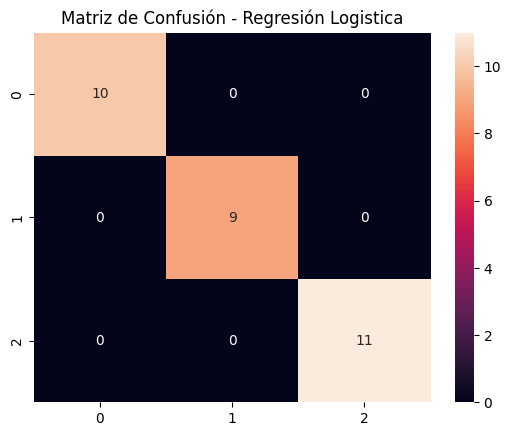

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Validación Cruzada (5-folds): 0.9733333333333334


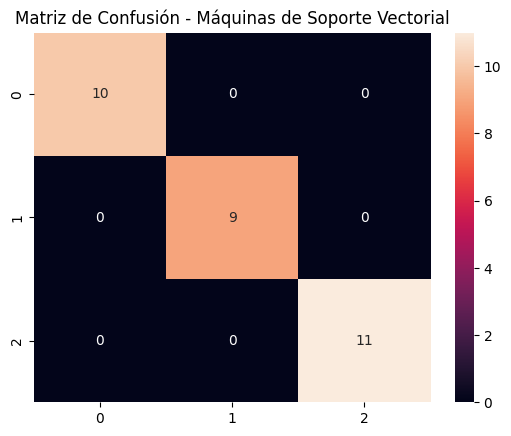

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Validación Cruzada (5-folds): 0.9666666666666666


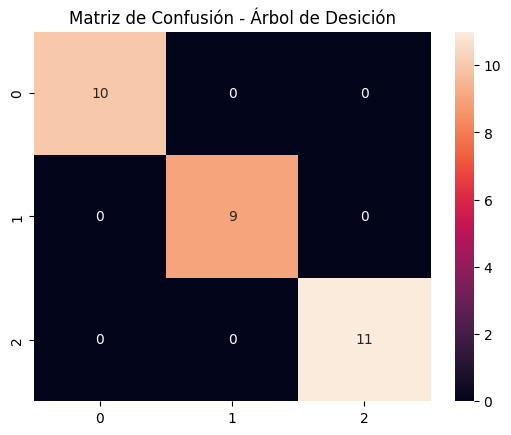

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Validación Cruzada (5-folds): 0.9666666666666668


In [93]:
for name, model in models.items():
    # Training
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)

    # Métricas de rendimiento
   
    # Métrica más robusta de medición del modelo
    cross_val = cross_val_score(model,x , y, cv=5)
    
    # Creación de la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,annot=True)
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()

    print(classification_report(y_test,y_pred))
    print(f'Validación Cruzada (5-folds): {cross_val.mean()}')

    